Scalable in situ single-cell profiling by electrophoretic capture of mRNA using EEL FISH

ShortName: Borm2022Scalable

Steps of processing the data from raw to Anndata:

In [1]:
# 1, Download the raw data from https://figshare.com/projects/Scalable_in_situ_single-cell_profiling_by_electrophoretic_capture_of_mRNA_using_EEL_FISH/143616

In [2]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad

In [3]:
path = '/home/yzy/PUBDT/st/EELFISH/raw_1'

In [4]:
file = 'LBEXP20210718_EEL_Mouse_448_2_20220512.h5ad'

In [5]:
adata = sc.read_h5ad(f'{path}/{file}')

In [6]:
adata

AnnData object with n_obs × n_vars = 127591 × 440
    obs: 'Clusters', 'TotalMolecules', 'X', 'X_um', 'Y', 'Y_um'
    var: 'GeneTotal'
    uns: 'Age', 'Codebook', 'ColorDict', 'CreationDate', 'Cycles', 'Expansion', 'Expansion_um', 'Experiment', 'ExperimentDate', 'FOVoverlapPercentage', 'GenerationDate', 'Joke', 'LOOM_SPEC_VERSION', 'MaxHammingDist', 'Operator', 'Orientation', 'Probes', 'Protocol', 'Quality', 'RNAfile', 'Removal', 'Sample', 'Segmentation', 'Species', 'Stitching', 'StitchingChannel', 'Strain', 'System', 'Tissue', 'TotalMolecules'
    obsm: 'RGB', 'tSNE'

In [7]:
adata.obsm['spatial'] = np.vstack([adata.obs['X_um'],adata.obs['Y_um']]).transpose()


In [9]:
adata.obs['Clusters'] = adata.obs['Clusters'].astype('category')

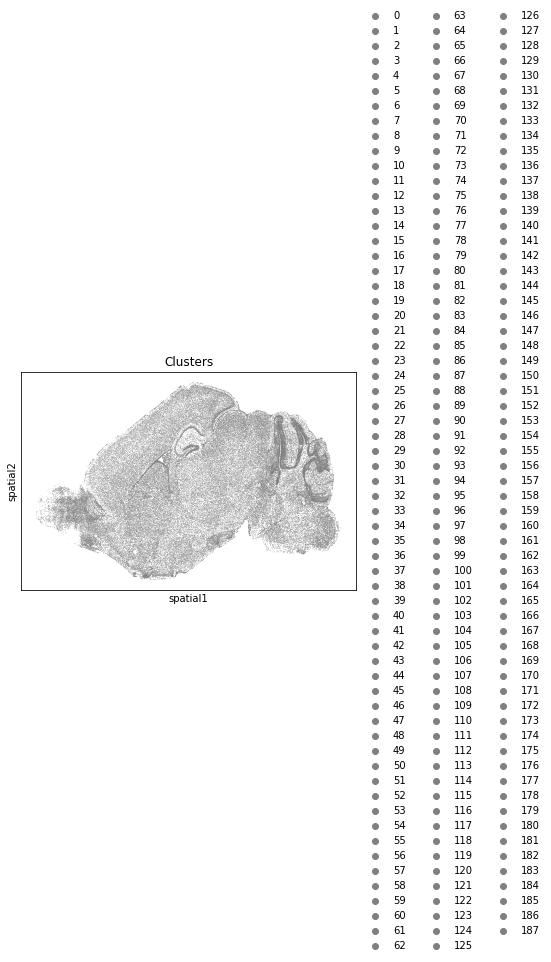

In [10]:
sc.pl.embedding(adata,basis='spatial',color=['Clusters'])

In [12]:
adata.write_h5ad(f'/home/yzy/PUBDT/st/EELFISH/h5ad/mouse_brain.h5ad')